#### importing necessary packages

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing iris dataset
from sklearn import datasets

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


#### importing dataset

In [4]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
print(iris.Species.unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [32]:
print(Counter(iris.Species))

Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})


#### there are total 150 datas about the iris flower <br> Each class has 50 datas



#### preprocessing

In [5]:
data = iris.drop('Id',axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# separating the dependent and independent values

x = data.drop('Species',axis=1)
y = data['Species']

In [7]:
#checking equal values

print('Total',data.shape,'\nx',x.shape,'\ny',y.shape)

Total (150, 5) 
x (150, 4) 
y (150,)


In [8]:
#null values

data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [10]:
print(x)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


## Visualization

#### Scatterplot on the basis of petal & sepal details

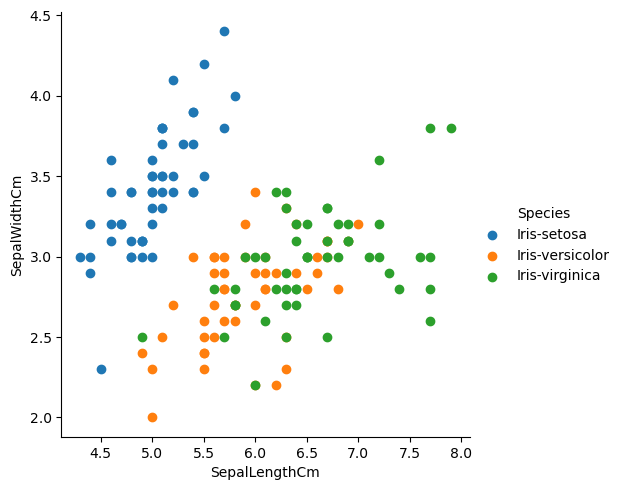

In [21]:
sns.FacetGrid(data, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

C:\Users\Bharat\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


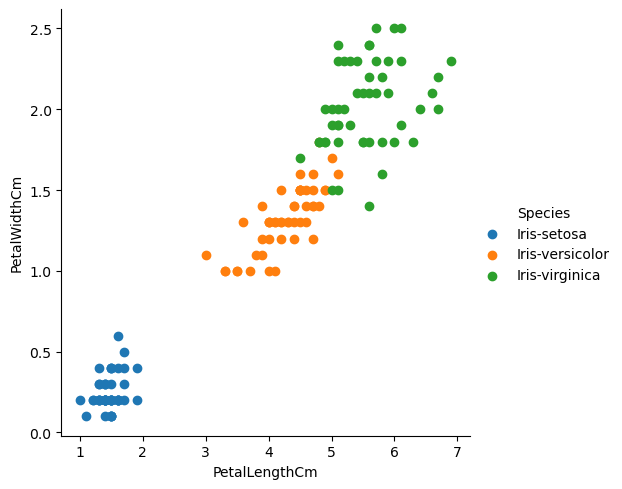

In [22]:
sns.FacetGrid(data, hue="Species", size=5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()
plt.show()

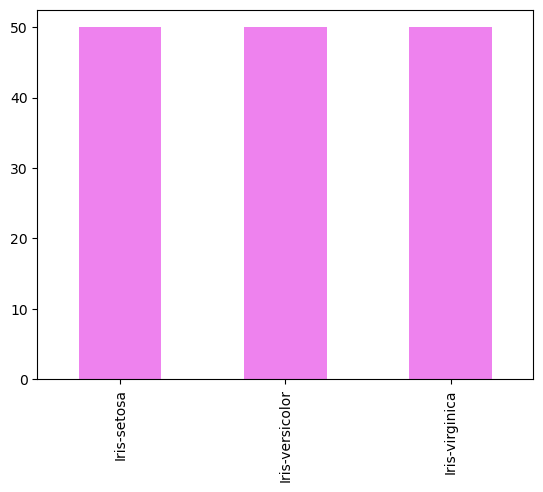

In [37]:
iris['Species'].value_counts().plot(kind='bar',color='violet')
plt.show()

### Model Building as a beginner we build a basic  3 model

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [43]:
ss = StandardScaler() # scaling step used to make easy to learn for our model

ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

#### 1. K- Nearest Neighbors Model

In [44]:
kclassifier = KNeighborsClassifier(n_neighbors=5)

kclassifier.fit(X_train,y_train)

KNeighborsClassifier()

In [50]:
kpred = kclassifier.predict(X_test)

#### 2. Naive Bayes Classifier Model

In [47]:
from sklearn.naive_bayes import GaussianNB


In [48]:
nbclassifier = GaussianNB()
nbclassifier.fit(X_train,y_train)

GaussianNB()

In [51]:
nbpred = nbclassifier.predict(X_test)

#### 3. Decision Tree classifier Model

In [53]:
dtclassifier = DecisionTreeClassifier()

dtclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
dtpred = dtclassifier.predict(X_test)

#### Result of 3 Model and Comparison

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('KNN Model')
result = confusion_matrix(y_test, kpred)

print("\nConfusion Matrix:")
print(result)
result1 = classification_report(y_test, kpred)
print("\n\nClassification Report:\n",)
print (result1)
result2k = accuracy_score(y_test,kpred)
print("\n\nAccuracy:",result2)

KNN Model

Confusion Matrix:
[[20  0  0]
 [ 0 14  0]
 [ 0  1 10]]


Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



Accuracy: 0.9777777777777777


In [67]:
print('Naive Bayes')
result = confusion_matrix(y_test, nbpred)
print("\nConfusion Matrix:")
print(result)
result1 = classification_report(y_test, nbpred)
print("\n\nClassification Report:\n",)
print (result1)
result2n = accuracy_score(y_test,nbpred)
print("\n\nAccuracy:",result2)

Naive Bayes

Confusion Matrix:
[[20  0  0]
 [ 0 13  1]
 [ 0  1 10]]


Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



Accuracy: 0.9777777777777777


In [66]:
print('Decision Tree Model')
result = confusion_matrix(y_test, dtpred)
print("\nConfusion Matrix:")
print(result)
result1 = classification_report(y_test, dtpred)
print("\n\nClassification Report:\n",)
print (result1)
result2d = accuracy_score(y_test,dtpred)
print("\n\nAccuracy:",result2)

Decision Tree Model

Confusion Matrix:
[[20  0  0]
 [ 0 14  0]
 [ 0  1 10]]


Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



Accuracy: 0.9777777777777777


In [72]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = ['Model Name','Accuracy']
pt.add_row(['KNN-classifier',result2k])
pt.add_row(['NB-classifier',result2n])
pt.add_row(['DT-classifier',result2d])
print(pt)

+----------------+--------------------+
|   Model Name   |      Accuracy      |
+----------------+--------------------+
| KNN-classifier | 0.9777777777777777 |
| NB-classifier  | 0.9555555555555556 |
| DT-classifier  | 0.9777777777777777 |
+----------------+--------------------+


#### From the Observed Result 2 Performed Equal in accuracy  <br>Precision of both models are also have the value of 0.98 and Recall value also same 0.98

#### Therefore we conclude that KNN and Decision Tree model has preformed on this dataset